In [5]:
# STEP 1: Install and import libraries
!pip install pytrends matplotlib pandas

import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [6]:
# STEP 2: Connect to Google Trends
pytrends = TrendReq(hl= 'en-GB', tz=0) # British english, default UK timezone UTC+0

In [9]:
# STEP 3: Pick artists (Davido,Wizkid,Burna Boy)
artists = ["Davido","Wizkid","Burna Boy"]
pytrends.build_payload(artists, timeframe= 'today 1-m', geo= 'GB') # trends for UK (geo ='GB'), for the past 30 days (timeframe='today 1-m')

In [27]:
# STEP 4: Fetch Google Trends data 
trends_data = pytrends.interest_over_time()
print("Sample of Google Trends data:\n")
print(trends_data.head(10))


Sample of Google Trends data:

            Davido  Wizkid  Burna Boy  isPartial
date                                            
2025-06-28      33      15         33      False
2025-06-29      31      15         32      False
2025-06-30      26       0         18      False
2025-07-01      14       0         20      False
2025-07-02      19      16         31      False
2025-07-03      13       0         36      False
2025-07-04      19       0         28      False
2025-07-05      14       0         21      False
2025-07-06      18      16         27      False
2025-07-07       0      15         28      False
Davido         33
Wizkid         23
Burna Boy     100
isPartial    True
dtype: object


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [29]:
#Find the artist and date with the overall highest score
max_value = trends_data.max().max()

# Find where it occurs
max_position = trends_data.stack().idxmax()

print(f"Max score is {max_value} on {max_position[0]} for {max_position[1]}")

Max score is 100 on 2025-07-15 00:00:00 for Burna Boy


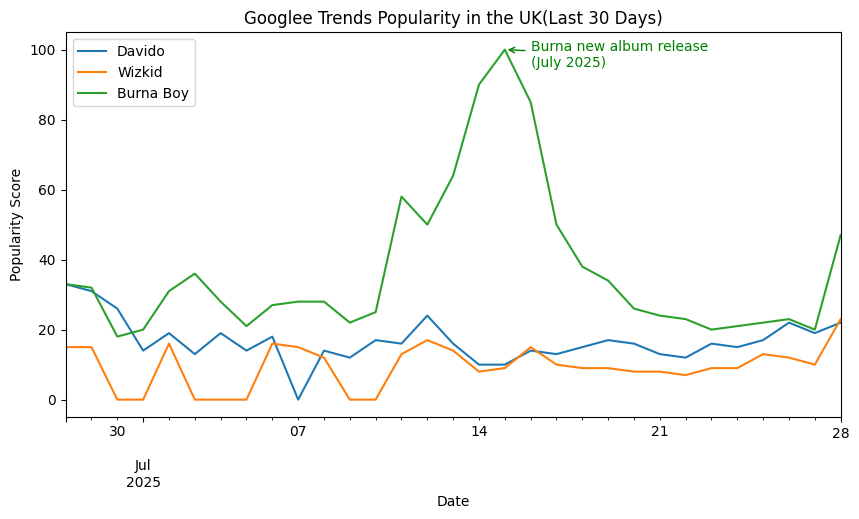

In [30]:
# STEP 5: Plot visualization of popularity over time
trends_data[artists].plot(figsize=(10,5))
plt.title("Googlee Trends Popularity in the UK(Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Popularity Score")
plt.legend(loc="upper left")
plt.annotate(
    "Burna new album release\n(July 2025)",
    xy=('2025-07-15', 100),        # Change 100 to the y-value (trend score) you see on the graph
    xytext=('2025-07-16', 95),    # Text position
    arrowprops=dict(arrowstyle="->", color="green"),
    fontsize=10,
    color="green"
)

plt.show()

In [15]:
# STEP 6: Get the most recent popularity score
latest_scores = trends_data.tail(1).T
latest_scores.columns = ["Latest Score"]
print("\nLatest Popularity Scores:\n")
print(latest_scores)


Latest Popularity Scores:

          Latest Score
Davido              40
Wizkid              26
Burna Boy           50
isPartial         True


In [16]:
# STEP 7: recommend venue based on popularity
def recommend_venue(score):
    if score > 70:
        return "stadium (50,000+ capacity)"
    elif score > 40: 
        return "Arena (10,000 - 20,000 capacity)"
    else:
        return "Small Hall / Theatre (<5,000)"
latest_scores['Recommended Venue'] = latest_scores['Latest Score'].apply(recommend_venue)

print("\nFinal Recommendation for London Venues:\n")
print(latest_scores)


Final Recommendation for London Venues:

          Latest Score                 Recommended Venue
Davido              40     Small Hall / Theatre (<5,000)
Wizkid              26     Small Hall / Theatre (<5,000)
Burna Boy           50  Arena (10,000 - 20,000 capacity)
isPartial         True     Small Hall / Theatre (<5,000)
